## Chess pieces classification with Convolutional Neural Networks

Using Kaggle's Chess pieces dataset (85x85): https://www.kaggle.com/datasets/s4lman/chess-pieces-dataset-85x85

## Dependencies

In [1]:
import os 
import random
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Obtaining the data

In [2]:
PATH = 'data'
os.chdir(PATH)

In [3]:
# Unzip the dataset
zip_ref = zipfile.ZipFile('archive.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
TRAIN_PROP = 0.8
TEST_PROP = 0.2
BATCH_SIZE = 32

In [5]:
class_names = os.listdir('data')

for class_name in class_names:
    if os.path.isdir(f'train/{class_name}') is False:
        os.makedirs(f'train/{class_name}')
    if os.path.isdir(f'test/{class_name}') is False:
        os.makedirs(f'test/{class_name}')

In [6]:
len(class_names)

6

In [7]:
class_sizes = []
for i in range(len(class_names)):
    path = os.path.join(PATH, f'{class_names[i]}')
    class_sizes.append(len(os.listdir(path)))

class_sizes

[67, 34, 71, 239, 34, 72]

In [8]:
classes = list(zip(class_names, class_sizes))
classes

[('bishop', 67),
 ('king', 34),
 ('knight', 71),
 ('pawn', 239),
 ('queen', 34),
 ('rook', 72)]

## Moving random sample of 80% to train folders

In [9]:
for class_name in classes:
    
    path = os.path.join(PATH, f'{class_name[0]}')
    
    for file in random.sample(os.listdir(path),
                             int(TRAIN_PROP * class_name[1])):
        
        filepath = os.path.join(path, file)
        dest = os.path.join('train', class_name[0], file)
        
        shutil.move(filepath, dest)
        print(f'Moving {filepath} ===> {dest}')

Moving data\bishop\69.png ===> train\bishop\69.png
Moving data\bishop\83.png ===> train\bishop\83.png
Moving data\bishop\35.png ===> train\bishop\35.png
Moving data\bishop\49.png ===> train\bishop\49.png
Moving data\bishop\37.png ===> train\bishop\37.png
Moving data\bishop\66.png ===> train\bishop\66.png
Moving data\bishop\53.png ===> train\bishop\53.png
Moving data\bishop\72.png ===> train\bishop\72.png
Moving data\bishop\36.png ===> train\bishop\36.png
Moving data\bishop\67.png ===> train\bishop\67.png
Moving data\bishop\41.png ===> train\bishop\41.png
Moving data\bishop\76.png ===> train\bishop\76.png
Moving data\bishop\46.png ===> train\bishop\46.png
Moving data\bishop\59.png ===> train\bishop\59.png
Moving data\bishop\58.png ===> train\bishop\58.png
Moving data\bishop\86.png ===> train\bishop\86.png
Moving data\bishop\87.png ===> train\bishop\87.png
Moving data\bishop\43.png ===> train\bishop\43.png
Moving data\bishop\82.png ===> train\bishop\82.png
Moving data\bishop\65.png ===> 

## Moving the ramaining data to test folders

In [10]:
for class_name in classes:
    
    path = os.path.join(PATH, f'{class_name[0]}')
    
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        dest = os.path.join('test', class_name[0], file)
        shutil.move(filepath, dest)
        print(f'Moving {filepath} ===> {dest}')

Moving data\bishop\100.png ===> test\bishop\100.png
Moving data\bishop\45.png ===> test\bishop\45.png
Moving data\bishop\54.png ===> test\bishop\54.png
Moving data\bishop\56.png ===> test\bishop\56.png
Moving data\bishop\60.png ===> test\bishop\60.png
Moving data\bishop\61.png ===> test\bishop\61.png
Moving data\bishop\63.png ===> test\bishop\63.png
Moving data\bishop\64.png ===> test\bishop\64.png
Moving data\bishop\68.png ===> test\bishop\68.png
Moving data\bishop\77.png ===> test\bishop\77.png
Moving data\bishop\80.png ===> test\bishop\80.png
Moving data\bishop\89.png ===> test\bishop\89.png
Moving data\bishop\95.png ===> test\bishop\95.png
Moving data\bishop\99.png ===> test\bishop\99.png
Moving data\king\10.png ===> test\king\10.png
Moving data\king\11.png ===> test\king\11.png
Moving data\king\15.png ===> test\king\15.png
Moving data\king\24.png ===> test\king\24.png
Moving data\king\26.png ===> test\king\26.png
Moving data\king\27.png ===> test\king\27.png
Moving data\king\4.png

## Importing the images

In [11]:
import tensorflow as tf

In [12]:
train_path = 'train'
test_path = 'test'

IMG_SIZE = (85, 85)
BATCH_SIZE = 32

In [13]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_path,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_path,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 411 files belonging to 6 classes.
Found 106 files belonging to 6 classes.


In [14]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 85, 85, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [15]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 85, 85, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [16]:
os.getcwd()

'E:\\dev\\Projetos\\computer-vision\\chess-pieces-vision\\data'

### Visualizing a random image from a batch

In [17]:
def plot_random_image():
    path = 'train'
    target_class = random.choice(class_names)
    path = os.path.join(path, target_class)
    
    random_img = random.choice(os.listdir(path))
    random_img_path = os.path.join(path, random_img)
    
    # Reading the randomly selected image
    img = mpimg.imread(random_img_path)
    plt.imshow(img)
    plt.title(f'Random Image of {target_class}')
    plt.axis(False)

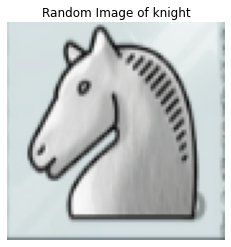

In [18]:
plot_random_image()

## Creating a model

In [19]:
input_shape = IMG_SIZE + (3,)

In [20]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Model

In [147]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Input layer
inputs = Input(shape=input_shape, name='input_layer')

# Adding data augmentation

x = preprocessing.Rescaling(1/255., name='first_data_aug')(inputs)
x = preprocessing.RandomRotation(0.1)(x)
x = preprocessing.RandomFlip('horizontal')(x)
x = preprocessing.RandomZoom(0.01)(x)
data_augmentation = preprocessing.RandomZoom(0.1)(x)


# First Conv2D
x = Conv2D(filters=16, 
          kernel_size=3,
          activation='relu')(data_augmentation)

# Second Conv2D
x = Conv2D(filters=16,
          kernel_size=3,
          activation='relu')(x)

# First MaxPool2D
x = MaxPool2D(pool_size=(2,2))(x)

# Third Conv2D
x = Conv2D(filters=32,
          kernel_size=3,
          activation='relu')(x)

# Second MaxPool2D
x = MaxPool2D(pool_size=(2,2))(x)

# Flatten
x = Flatten()(x)

# Output layer
output = Dense(6, 
               activation='softmax', 
               name='output_layer')(x)

#Create the model
model = Model(inputs=inputs, outputs=output)

In [148]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# Fit the model
hist = model.fit(train_data,
          epochs=15,
         validation_data=test_data,
         steps_per_epoch=len(train_data),
         validation_steps=len(test_data))

Epoch 1/15
13/13 [==============================] - 2s 115ms/step - loss: 1.5975 - accuracy: 0.4380 - val_loss: 1.4756 - val_accuracy: 0.4528
Epoch 2/15
13/13 [==============================] - 1s 105ms/step - loss: 1.4119 - accuracy: 0.4769 - val_loss: 1.1491 - val_accuracy: 0.5566
Epoch 3/15
13/13 [==============================] - 2s 113ms/step - loss: 1.0110 - accuracy: 0.6156 - val_loss: 0.6351 - val_accuracy: 0.8208
Epoch 4/15
13/13 [==============================] - 2s 113ms/step - loss: 0.6302 - accuracy: 0.8078 - val_loss: 0.4251 - val_accuracy: 0.8585
Epoch 5/15
13/13 [==============================] - 2s 113ms/step - loss: 0.5160 - accuracy: 0.8467 - val_loss: 0.3109 - val_accuracy: 0.8774
Epoch 6/15
13/13 [==============================] - 2s 113ms/step - loss: 0.4555 - accuracy: 0.8540 - val_loss: 0.3290 - val_accuracy: 0.8774
Epoch 7/15
13/13 [==============================] - 1s 108ms/step - loss: 0.3706 - accuracy: 0.8954 - val_loss: 0.2709 - val_accuracy: 0.9245
Epoch 

## 96.23% Validation Accuracy!

<AxesSubplot:>

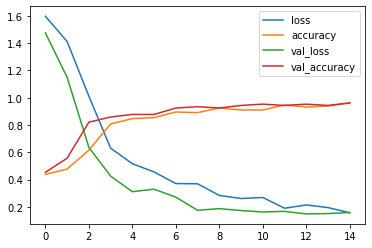

In [149]:
import pandas as pd
pd.DataFrame(hist.history).plot()

### Making predictions

In [221]:
def plot_predict(model):
    """
    Imports a random image, predicts on it and plot
    """
    class_name = random.choice(class_names)
    
    path = os.path.join('test', class_name)

    random_image = random.choice(os.listdir(path))
    imagepath = os.path.join(path, random_image)
    
    image = tf.io.read_file(imagepath)
    image = tf.image.decode_image(image)
  
    plt.imshow(image)
    plt.axis('off')
    
    pred = model.predict(tf.expand_dims(image, axis=0))
    
    pred_class = class_names[tf.argmax(tf.squeeze(pred))]
    
    confidence = tf.reduce_max(tf.squeeze(pred)) * 100
    
    
    color ='green' if (class_name == pred_class) else'red'
    
    plt.title(f'Class: {class_name} | Predicted {pred_class} {confidence:.2f} %',
             color=color)

1/1 [==============================] - 0s 14ms/step


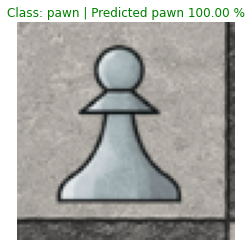

In [237]:
plot_predict(model)

In [238]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 85, 85, 3)]       0         
                                                                 
 first_data_aug (Rescaling)  (None, 85, 85, 3)         0         
                                                                 
 random_rotation_7 (RandomRo  (None, 85, 85, 3)        0         
 tation)                                                         
                                                                 
 random_flip_8 (RandomFlip)  (None, 85, 85, 3)         0         
                                                                 
 random_zoom_16 (RandomZoom)  (None, 85, 85, 3)        0         
                                                                 
 random_zoom_17 (RandomZoom)  (None, 85, 85, 3)        0         
                                                           